Name = Durgaprasad
id = 23111171

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

movie_dataset = pd.read_csv('movie.csv')
movie_dataset['release_year'] = pd.to_datetime(movie_dataset['release_date'], errors='coerce').dt.year
# Select features for clustering
features = ['popularity', 'vote_average', 'vote_count']
clustering_data = movie_dataset[features].dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# display top 5
movie_dataset.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count,release_year
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318,2022
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320,1994
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973,2009
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304,2008
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477,2000


In [26]:
# Function to compute and display statistical depth
def compute_statistics(data, numerical_columns):
    """
    code that calculates and displays major statistical moments, correlation matrix, and summary statistics.

    """
    # statistical moments
    stats = {}
    for col in numerical_columns:
        stats[col] = {
            'Mean': data[col].mean(),
            'Median': data[col].median(),
            'Standard Deviation': data[col].std(),
            'Skewness': data[col].skew(),
            'Kurtosis': data[col].kurt()
        }

    print("Statistical Moments:")
    for col, moments in stats.items():
        print(f"\nColumn: {col}")
        for moment, value in moments.items():
            print(f"  {moment}: {value:.2f}")
    correlation_matrix = data[numerical_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    print("\nDataset Summary (describe):")
    print(data[numerical_columns].describe())

#  numerical columns
numerical_columns = ['popularity', 'vote_average', 'vote_count']

# Call  function
compute_statistics(movie_dataset, numerical_columns)


Statistical Moments:

Column: popularity
  Mean: 29.86
  Median: 20.95
  Standard Deviation: 53.93
  Skewness: 28.39
  Kurtosis: 1264.98

Column: vote_average
  Mean: 6.80
  Median: 6.77
  Standard Deviation: 0.63
  Skewness: 0.28
  Kurtosis: -0.66

Column: vote_count
  Mean: 2104.04
  Median: 895.00
  Standard Deviation: 3264.36
  Skewness: 3.83
  Kurtosis: 19.41

Correlation Matrix:
              popularity  vote_average  vote_count
popularity      1.000000      0.116519    0.275536
vote_average    0.116519      1.000000    0.274754
vote_count      0.275536      0.274754    1.000000

Dataset Summary (describe):
        popularity  vote_average    vote_count
count  8580.000000   8580.000000   8580.000000
mean     29.863904      6.804031   2104.044172
std      53.930147      0.628188   3264.360149
min       0.023000      5.688000    300.000000
25%      14.722750      6.300000    477.000000
50%      20.945500      6.769000    895.000000
75%      32.027750      7.272000   2137.500000
max

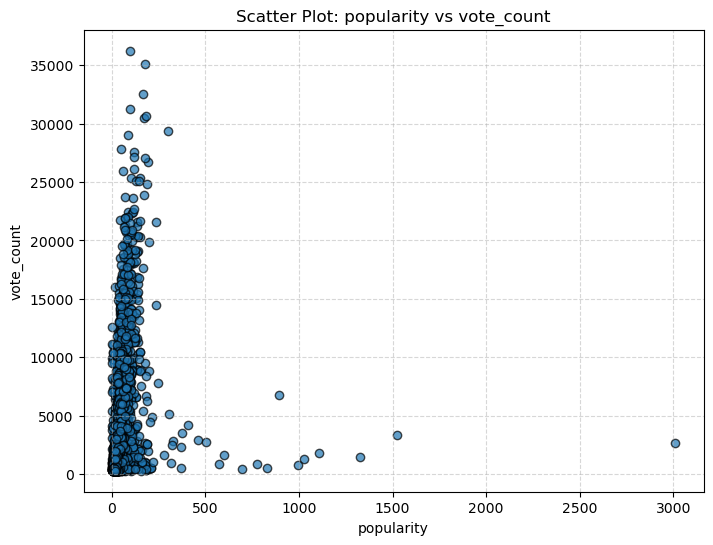

In [27]:
# Relational Graph Function
def create_scatter_plot(data, x_column, y_column):
    """
    Creates a scatter plot to visualize the relationship between two variables.

    Parameters:
        data (pd.DataFrame): The dataset to plot.
        x_column (str): The column for the x-axis.
        y_column (str): The column for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_column], data[y_column], alpha=0.7, edgecolor='k')
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Call the function
create_scatter_plot(movie_dataset, x_column='popularity', y_column='vote_count')


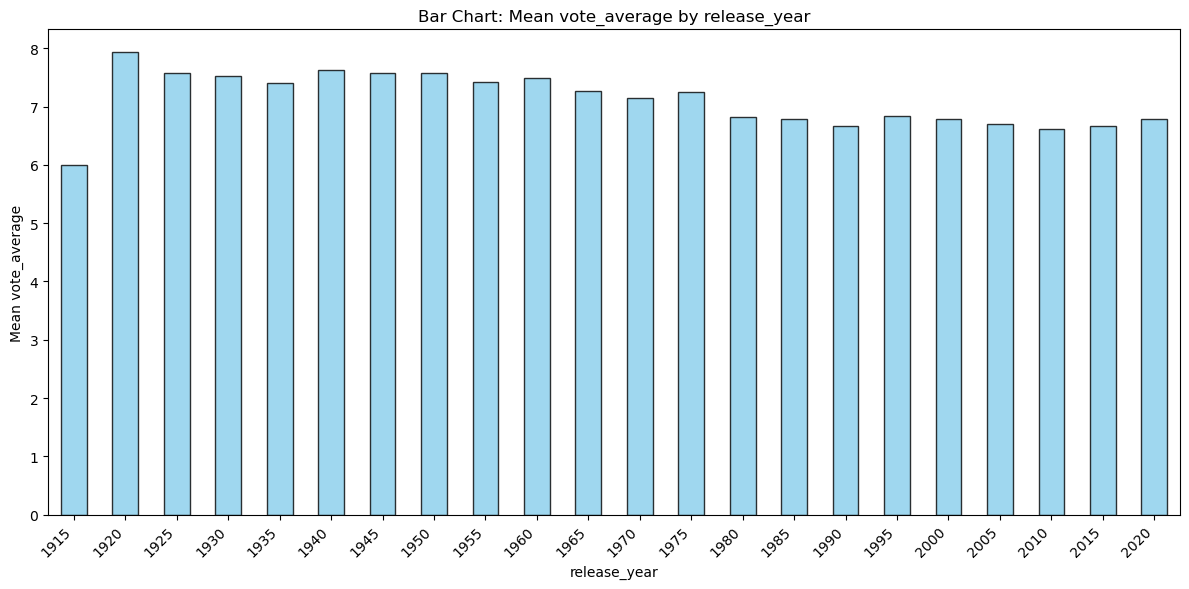

In [28]:
# Improved Bar Chart Function
def create_bar_chart(data, category_column, numerical_column, agg_func='mean', step=10):
    """
    cod efor bar chart aggregating categories and reducing overcrowding.


    """
    # Group data and aggregate
    grouped_data = data.groupby(category_column)[numerical_column].agg(agg_func).dropna()

    # Select every 'step' for the x-axis
    grouped_data = grouped_data[grouped_data.index % step == 0]

    # Plotbar plot
    grouped_data.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(f'Bar Chart: {agg_func.capitalize()} {numerical_column} by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel(f'{agg_func.capitalize()} {numerical_column}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()

# Call the function 
create_bar_chart(movie_dataset, category_column='release_year', numerical_column='vote_average', step=5)



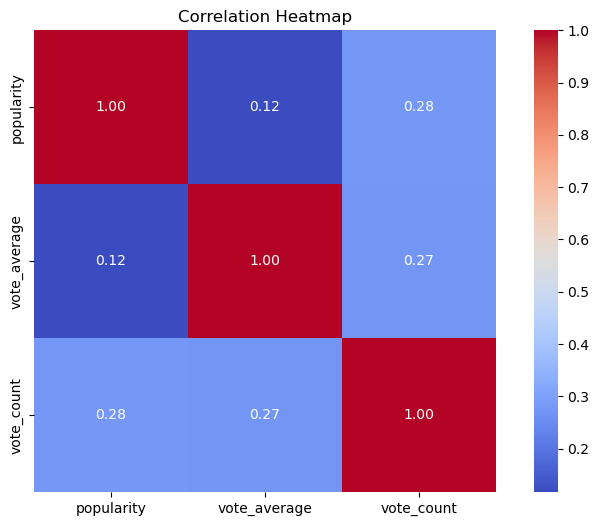

In [29]:
# Statistical Graph Function
def create_heatmap(data):
    """
    Creates a heatmap represnting correlations between numerical columns.

    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function
numerical_columns = ['popularity', 'vote_average', 'vote_count']
create_heatmap(movie_dataset[numerical_columns])


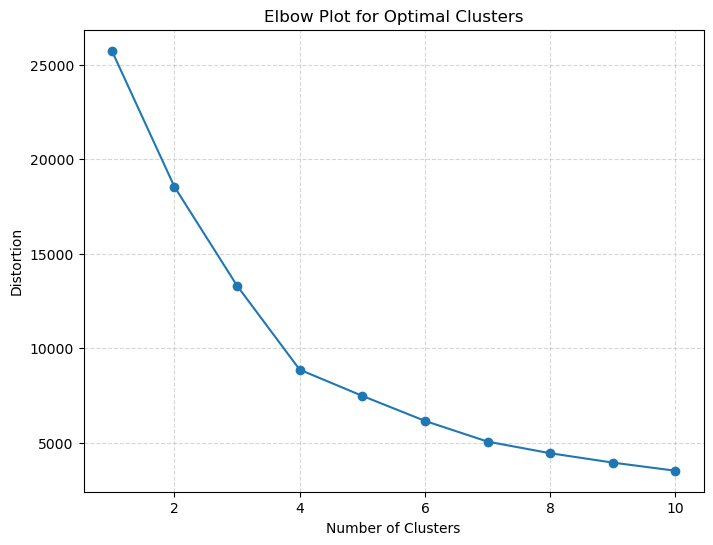

In [30]:
# Function to perform clustering and visualize elbow plot
def clustering_with_elbow(data, max_clusters=10):
    """
    Performs clustering using K-Means and visualizes the elbow plot.

    Parameters:
        data (pd.DataFrame): Normalized dataset for clustering.
        max_clusters (int): Maximum number of clusters to consider.
    """
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Call the elbow function
clustering_with_elbow(normalized_data, max_clusters=10)

C:\Users\durga\OneDrive\Documents\Desktop\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


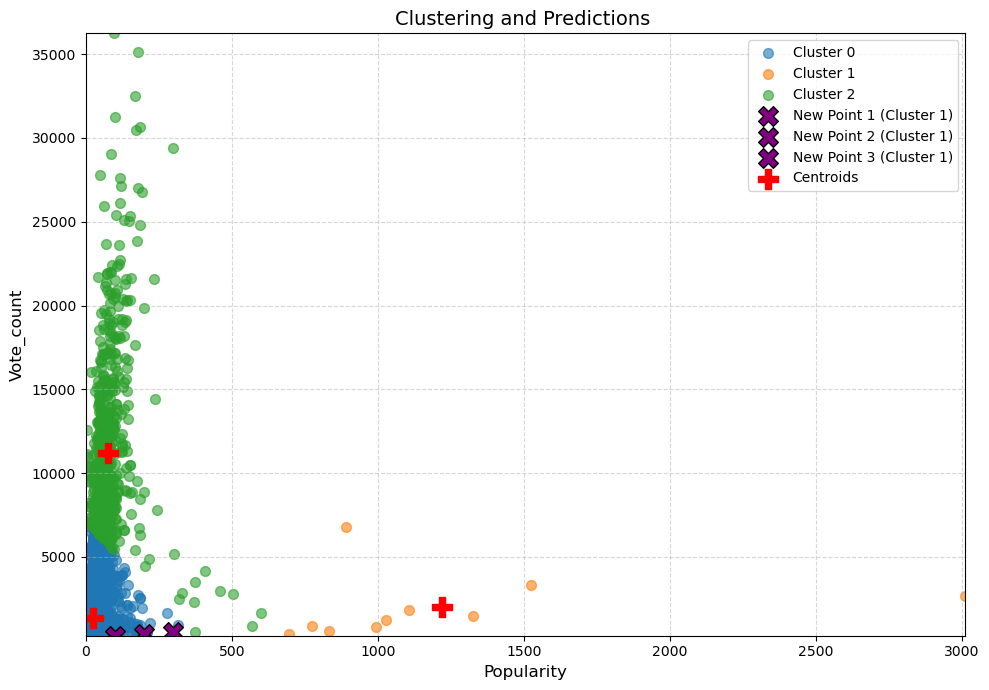

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# Select Features for Clustering
features = ['popularity', 'vote_count']
clustering_data = movie_dataset[features].dropna()

# Normalize Data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Perform K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(normalized_data)

# Add Cluster Labels to the Data
clustered_data = clustering_data.copy()
clustered_data['cluster'] = kmeans_labels

# Define New Points for Prediction
new_points = np.array([[100, 300], [200, 400], [300, 500]])
normalized_new_points = scaler.transform(new_points)

# Improved Visualization Function
def predict_clusters_and_visualize_filtered(kmeans_model, data, new_points, x_column, y_column):
    """
    Predicts clusters for  points and visualizes clusters graphically.

   
    """
    plt.figure(figsize=(10, 7))

    # Plot each cluster
    for cluster in range(kmeans_model.n_clusters):
        clustered_points = data[data['cluster'] == cluster]
        plt.scatter(
            clustered_points[x_column],
            clustered_points[y_column],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=50
        )

    # Predict new points and plot them
    new_labels = kmeans_model.predict(new_points)
    for i, (point, label) in enumerate(zip(new_points, new_labels)):
        plt.scatter(
            point[0],
            point[1],
            color='purple',
            edgecolor='black',
            marker='X',
            s=200,
            label=f'New Point {i+1} (Cluster {label})'
        )

    # Plot centroids
    centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color='red',
        marker='P',
        s=200,
        label='Centroids'
    )

    # Add labels and title
    plt.title('Clustering and Predictions ', fontsize=14)
    plt.xlabel(x_column.capitalize(), fontsize=12)
    plt.ylabel(y_column.capitalize(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Dynamic axis limits based on data
    plt.xlim(data[x_column].min() - 0.1, data[x_column].max() + 0.1)
    plt.ylim(data[y_column].min() - 0.1, data[y_column].max() + 0.1)

    plt.tight_layout()
    plt.show()

# Call the function
predict_clusters_and_visualize_filtered(
    kmeans_model=kmeans_model,
    data=clustered_data,
    new_points=new_points,
    x_column='popularity',
    y_column='vote_count'
)


C:\Users\durga\OneDrive\Documents\Desktop\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


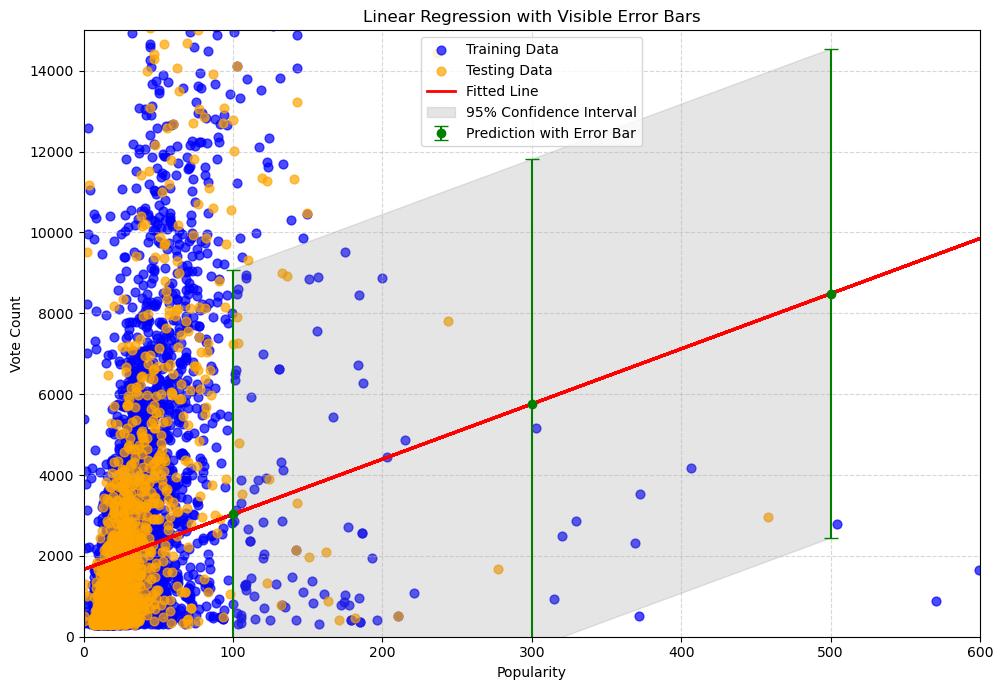

Point 1: Prediction=3028.14, CI=(-3021.46, 9077.74)
Point 2: Prediction=5757.17, CI=(-292.43, 11806.77)
Point 3: Prediction=8486.19, CI=(2436.60, 14535.79)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Handle missing values by dropping rows where either X or y is missing
dataset = movie_dataset[['popularity', 'vote_count']].dropna()

# Split the dataset into independent (X) and dependent (y) variables
X = dataset[['popularity']]  # Independent variable
y = dataset['vote_count']    # Dependent variable

# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define new points for prediction
new_points = np.array([[100], [300], [500]])

# Improved Linear Regression Visualization with Enlarged Error Bars
def linear_regression_with_visible_error_bars(X_train, X_test, y_train, y_test, new_points):
    """
    linear regression model predicts points and fitting line _train and y_train

    
    """
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    predictions = model.predict(new_points)

    # Confidence intervals
    residuals = y_train - y_train_pred
    std_error = np.std(residuals)
    lower_bound = predictions - 1.96 * std_error
    upper_bound = predictions + 1.96 * std_error

    # Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.7, color='blue', s=40)
    plt.scatter(X_test, y_test, label='Testing Data', alpha=0.7, color='orange', s=40)
    plt.plot(X_train, y_train_pred, color='red', label='Fitted Line', linewidth=2)

    # Add error bars
    for i, point in enumerate(new_points.squeeze()):
        plt.errorbar(
            point, predictions[i],
            yerr=1.96 * std_error,
            fmt='o',
            color='green',
            capsize=5,
            label='Prediction with Error Bar' if i == 0 else ""  # Add label only once
        )

    # Add confidence interval shading
    plt.fill_between(
        new_points.squeeze(),
        lower_bound,
        upper_bound,
        color='gray',
        alpha=0.2,
        label='95% Confidence Interval'
    )

    # Axis adjustments for better visibility
    plt.title('Linear Regression with Visible Error Bars')
    plt.xlabel('Popularity')
    plt.ylabel('Vote Count')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.xlim(0, 600)  # Adjust limits for better focus
    plt.ylim(0, 15000)  # Adjust limits for better focus
    plt.show()

    # Print predictions with confidence intervals
    for i, pred in enumerate(predictions):
        print(f"Point {i+1}: Prediction={pred:.2f}, CI=({lower_bound[i]:.2f}, {upper_bound[i]:.2f})")

# Call the function
linear_regression_with_visible_error_bars(X_train, X_test, y_train, y_test, new_points)
